### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [ ]:
data = pd.read_csv('data/coupons.csv')

In [ ]:
data.describe()

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,12684.000000,12684.000000,12684.0,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000
mean,63.301798,0.414144,1.0,0.561495,0.119126,0.214759,0.785241,0.568433
std,19.154486,0.492593,0.0,0.496224,0.323950,0.410671,0.410671,0.495314
min,30.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,80.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,80.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
max,80.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
data.head(20)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
5,No Urgent Place,Friend(s),Sunny,80,6PM,Restaurant(<20),2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
6,No Urgent Place,Friend(s),Sunny,55,2PM,Carry out & Take away,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
7,No Urgent Place,Kid(s),Sunny,80,10AM,Restaurant(<20),2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
8,No Urgent Place,Kid(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [ ]:
data.tail(20)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
12664,No Urgent Place,Friend(s),Sunny,55,10PM,Bar,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12665,No Urgent Place,Friend(s),Sunny,30,10AM,Carry out & Take away,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,0,1,1
12666,No Urgent Place,Friend(s),Snowy,30,2PM,Restaurant(<20),1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,0,1,1
12667,No Urgent Place,Alone,Rainy,55,10AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12668,No Urgent Place,Alone,Sunny,80,10AM,Restaurant(<20),2h,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,0,1,1
12669,No Urgent Place,Partner,Sunny,30,10AM,Restaurant(20-50),1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,0,1,1
12670,No Urgent Place,Partner,Rainy,55,6PM,Bar,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12671,No Urgent Place,Partner,Snowy,30,10AM,Restaurant(<20),1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,0,1,1
12672,Home,Alone,Sunny,80,6PM,Carry out & Take away,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,1,0,0
12673,Home,Alone,Sunny,30,6PM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,0,1,0


In [ ]:
#I wanted to try this Y Data Profiling from Live Session
#install Automated EDA
!pip install ydata-profiling

In [ ]:
from ydata_profiling import ProfileReport

profile = ProfileReport(data)
profile.to_file(output_file='output.html')


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 26/26 [00:02<00:00, 10.79it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
#Display results of profile
profile
#Analysis:This is a great tool to quickly find anomolies.
# Missing Cells 13370-> Nan or none values found 4.1%, might remove but small
#enough of a percentage to keep
# Duplicate Rows: 74 -> will need to remove



2. Investigate the dataset for missing or problematic data.

In [ ]:
# Check for missing values
print(data.isnull().sum())

#Based on results, there is a high count of missing values for column Car.


destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64


In [ ]:
#check for duplicate data
data[data.duplicated()]


,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
4192,Work,Alone,Sunny,80,7AM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,less1,less1,1,1,1,0,1,1
4236,Work,Alone,Sunny,80,7AM,Carry out & Take away,1d,Male,26,Single,...,gt8,gt8,4~8,less1,1,1,1,0,1,1
4280,Work,Alone,Sunny,80,7AM,Carry out & Take away,1d,Female,26,Single,...,never,4~8,1~3,less1,1,1,1,0,1,1
4324,Work,Alone,Sunny,80,7AM,Carry out & Take away,1d,Female,46,Single,...,never,4~8,1~3,1~3,1,1,1,0,1,1
4409,Work,Alone,Sunny,80,7AM,Carry out & Take away,1d,Female,21,Single,...,never,less1,1~3,never,1,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8511,Home,Alone,Sunny,80,6PM,Bar,2h,Male,46,Married partner,...,1~3,1~3,less1,1~3,1,0,0,1,0,1
8512,Home,Partner,Sunny,30,10PM,Carry out & Take away,2h,Male,46,Married partner,...,1~3,1~3,less1,1~3,1,1,0,0,1,1
8513,Work,Alone,Rainy,55,7AM,Restaurant(<20),2h,Male,46,Married partner,...,1~3,1~3,less1,1~3,1,1,1,0,1,0
8515,Work,Alone,Snowy,30,7AM,Restaurant(20-50),1d,Male,46,Married partner,...,1~3,1~3,less1,1~3,1,1,1,0,1,0


In [ ]:
#check for duplicate values to see if I can match YData tool of 74
print(data.duplicated().sum())
# 74 is a match

74


In [ ]:
#check for missing or Nan
data.isna().sum()

,0
destination,0
passanger,0
weather,0
temperature,0
time,0
coupon,0
expiration,0
gender,0
age,0
maritalStatus,0


In [ ]:
#isna to get percentage
data.isna().mean().multiply(100).round(2)


,0
destination,0.00
passanger,0.00
weather,0.00
temperature,0.00
time,0.00
coupon,0.00
expiration,0.00
gender,0.00
age,0.00
maritalStatus,0.00


3. Decide what to do about your missing data -- drop, replace, other...

In [ ]:
#Dropping Car column since it has the most missing values at 99%, using inplace
#make it permanent
data.drop('car', axis=1, inplace=True)

<Axes: >

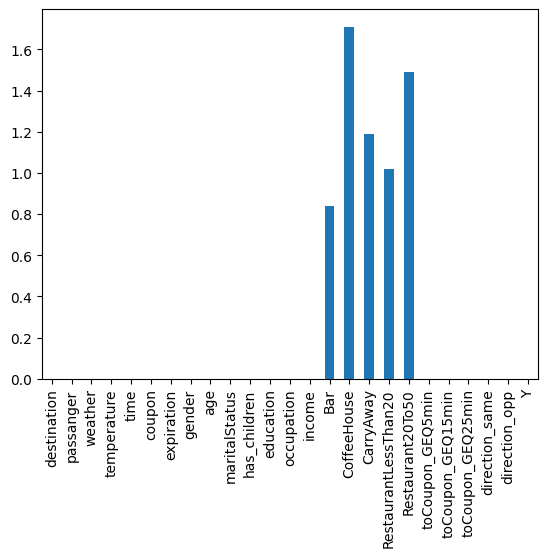

In [ ]:
#apply a visual after dropping car column
data.isna().mean().multiply(100).round(2).plot(kind='bar')

In [ ]:
#drop duplicate records
data.drop_duplicates(inplace=True)


In [ ]:
print(data.duplicated().sum())
#no duplicates left

0


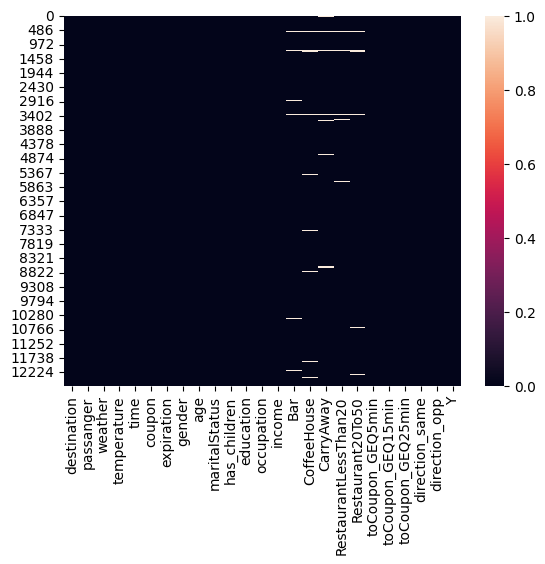

In [ ]:
#heatmap
sns.heatmap(data.isnull());

In [ ]:
age_counts = data['age'].value_counts()
print(age_counts)

age
21         2642
26         2548
31         2019
50plus     1781
36         1317
41         1089
46          670
below21     544
Name: count, dtype: int64


4. What proportion of the total observations chose to accept the coupon?



In [ ]:
# Answer: 57%
accepted_coupon = data['Y'].mean().round(2)
print(accepted_coupon)


0.57


([<matplotlib.axis.XTick at 0x7d5223f82d90>,
 [Text(0, 0, 'Not Accepted'), Text(1, 0, 'Accepted')])

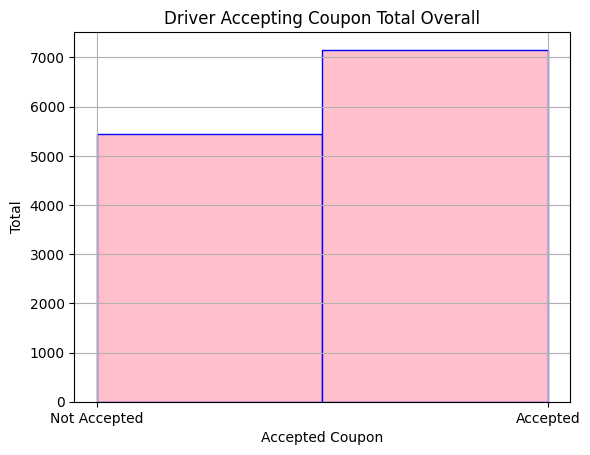

In [ ]:
#Histogram visualizing 57% acceptance vs. non-acceptance
data['Y'].hist(bins=2, edgecolor='blue', color='pink')
plt.title('Driver Accepting Coupon Total Overall')
plt.xlabel('Accepted Coupon')
plt.ylabel('Total')
plt.xticks([0, 1], ['Not Accepted', 'Accepted'])

5. Use a bar plot to visualize the `coupon` column.

In [ ]:
data.head(10)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
5,No Urgent Place,Friend(s),Sunny,80,6PM,Restaurant(<20),2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
6,No Urgent Place,Friend(s),Sunny,55,2PM,Carry out & Take away,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
7,No Urgent Place,Kid(s),Sunny,80,10AM,Restaurant(<20),2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
8,No Urgent Place,Kid(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


([0, 1, 2, 3, 4],
 [Text(0, 0, 'Restaurant(<20)'),
  Text(1, 0, 'Coffee House'),
  Text(2, 0, 'Carry out & Take away'),
  Text(3, 0, 'Bar'),
  Text(4, 0, 'Restaurant(20-50)')])

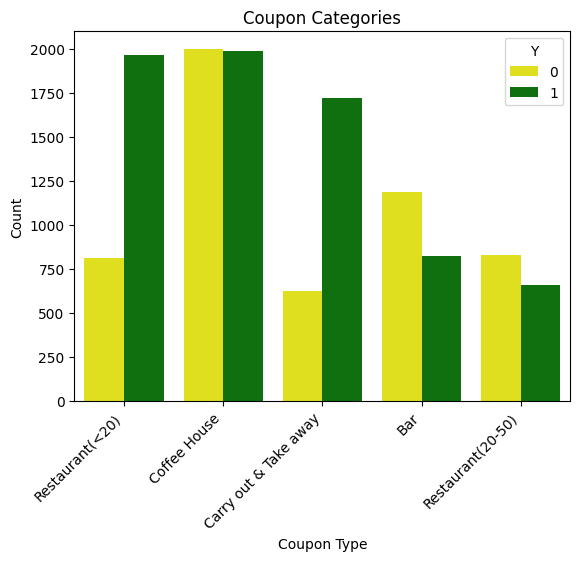

In [ ]:
#will use seaborn to bar plot the coupon column
#experimented with hue and palette
sns.countplot(data=data, x='coupon', hue='Y', palette=['yellow','green'])
plt.title('Coupon Categories')
plt.xlabel('Coupon Type')
plt.ylabel('Count')
#I had to search for this next command as it wasn't covered but want to fix the overlap on x axis
plt.xticks(rotation=45, ha='right')


6. Use a histogram to visualize the temperature column.

Text(0, 0.5, 'Frequency')

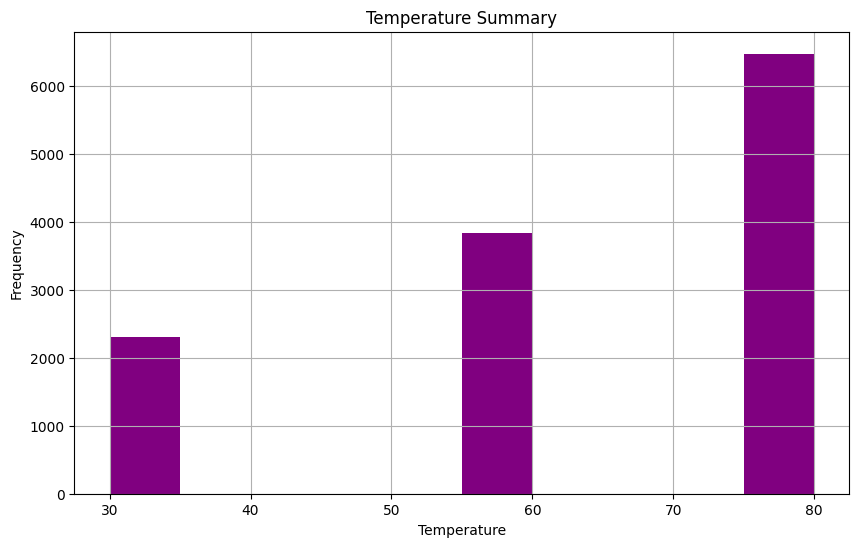

In [ ]:
#Using hist and adjust figsize to make larger
data.hist(column='temperature', color = 'purple', figsize=(10, 6))
plt.title('Temperature Summary')
plt.xlabel('Temperature')
plt.ylabel('Frequency')


**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [ ]:
# New Data Fram called bar_coupon, containing just bar related coupons

bar_coupon = data[data['coupon'] == 'Bar']
bar_coupon.head(10)


,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,1,0,1
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,1,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1
39,Work,Alone,Sunny,55,7AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,1,1,0,1,1
46,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,46,Single,...,4~8,1~3,1~3,never,1,0,0,0,1,0
57,Home,Alone,Sunny,55,6PM,Bar,1d,Male,46,Single,...,4~8,1~3,1~3,never,1,0,0,1,0,0
61,Work,Alone,Sunny,55,7AM,Bar,1d,Male,46,Single,...,4~8,1~3,1~3,never,1,1,1,0,1,0
75,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Male,46,Married partner,...,1~3,1~3,1~3,less1,1,1,0,0,1,1


2. What proportion of bar coupons were accepted?


In [ ]:
# Renaming 'Y' column to 'Coupon Accepted" to make it more understandable
bar_coupon = bar_coupon.rename(columns={'Y': 'Coupon Accepted'})
bar_coupon.head(10)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Coupon Accepted
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,1,0,1
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,1,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1
39,Work,Alone,Sunny,55,7AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,1,1,0,1,1
46,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,46,Single,...,4~8,1~3,1~3,never,1,0,0,0,1,0
57,Home,Alone,Sunny,55,6PM,Bar,1d,Male,46,Single,...,4~8,1~3,1~3,never,1,0,0,1,0,0
61,Work,Alone,Sunny,55,7AM,Bar,1d,Male,46,Single,...,4~8,1~3,1~3,never,1,1,1,0,1,0
75,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Male,46,Married partner,...,1~3,1~3,1~3,less1,1,1,0,0,1,1


In [ ]:
#Answer to question: What proportion of bar coupons were accepted ? = 41%
proportion_accepted_bar = bar_coupon['Coupon Accepted'].mean().round(2)
#adding *100 to make it a whole number
print(proportion_accepted_bar * 100)

41.0


In [ ]:
print(bar_coupon.columns)

Index(['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'Bar', 'CoffeeHouse', 'CarryAway',
       'RestaurantLessThan20', 'Restaurant20To50', 'toCoupon_GEQ5min',
       'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'direction_same',
       'direction_opp', 'Coupon Accepted'],
      dtype='object')


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [ ]:
# Including "count" as a weight to indicating more participants in the result
# Output: Suggests that individuals who visit bars more often are more likely to accept
# the bar coupon, with those visiting 1-3 times a month representing the largest
# segment of coupon acceptors in this dataset. Individuals who visit
# bars less frequently or never are less likely to accept the bar coupon.

bar_coupon.groupby(["Bar", "Coupon Accepted"], as_index= False)['Coupon Accepted'].agg(['count', 'mean']).round(2)


,Bar,Coupon Accepted,count,mean
0,1~3,0,140,0.0
1,1~3,1,257,1.0
2,4~8,0,33,0.0
3,4~8,1,117,1.0
4,gt8,0,13,0.0
5,gt8,1,36,1.0
6,less1,0,313,0.0
7,less1,1,250,1.0
8,never,0,674,0.0
9,never,1,156,1.0


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [ ]:
print(bar_coupon.columns)

Index(['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'Bar', 'CoffeeHouse', 'CarryAway',
       'RestaurantLessThan20', 'Restaurant20To50', 'toCoupon_GEQ5min',
       'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'direction_same',
       'direction_opp', 'Coupon Accepted'],
      dtype='object')


In [ ]:
#Will use Numpy versus GroupBy, get a difference aspect on data
#Answer:Drivers who go to a bar more than once a month and are over the age of 25 have an acceptance rate of 68%.
#All other drivers (those who go to a bar less than or equal to once a month or are 25 or younger, or both) have an acceptance rate of 41%.
#This indicates that drivers who frequently visit bars and are over 25 years old are much more likely to accept a bar coupon compared to other drivers.

bar_coupon['bar_visits_and_age'] = np.where((bar_coupon['Bar'].isin(['1 to 3', '4 to 8', 'gt8'])) & (bar_coupon['age'] > '25'),'More than once a month & > 25','Other')

acceptance_rate = bar_coupon.groupby('bar_visits_and_age')['Coupon Accepted'].mean().round(2)

print(acceptance_rate *100)

bar_visits_and_age
More than once a month & > 25    68.0
Other                            41.0
Name: Coupon Accepted, dtype: float64


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [ ]:
#Repeating above code and adding passanger and occupation
#Answer: Identifying a High-Acceptance Segment: The combination of going to a bar
#frequently (more than once a month), not having a child as a passenger, and having
#an occupation outside of farming, fishing, or forestry appears to be a strong
#predictor of accepting a bar coupon.
#Significantly more likely to accept a bar coupon (73%) compared to those in the "Other" group (40%).
bar_coupon['group'] = np.where((bar_coupon['Bar'].isin(['1 to 3', '4 to 8', 'gt8'])) & (bar_coupon['passanger'] != 'Kid(s)') &
    (bar_coupon['occupation'] != 'Farming') &
    (bar_coupon['occupation'] != 'Fishing') &
    (bar_coupon['occupation'] != 'Forestry'),
    'Bar > 1/month, Non-kid passengers, Non-farming/fishing/forestry','Other')

acceptance_rate = bar_coupon.groupby('group')['Coupon Accepted'].mean().round(2)

print(acceptance_rate *100)

group
Bar > 1/month, Non-kid passengers, Non-farming/fishing/forestry    73.0
Other                                                              40.0
Name: Coupon Accepted, dtype: float64


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [ ]:
print(bar_coupon.columns)

Index(['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'Bar', 'CoffeeHouse', 'CarryAway',
       'RestaurantLessThan20', 'Restaurant20To50', 'toCoupon_GEQ5min',
       'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'direction_same',
       'direction_opp', 'Coupon Accepted', 'bar_visits_and_age', 'group'],
      dtype='object')


In [ ]:
#Using GroupBy function to get a holistic view
#go to bars more than once a month, had passengers that were not a kid, and were not widowed
bar_coupon.groupby(["Bar", "maritalStatus", "passanger"], as_index= False)['Coupon Accepted'].agg(['count', 'mean']).round(2).sort_values(by='count', ascending=False)

#Answer: This suggests that among the more common demographics in this data, individuals
#who are Single, Alone, and visit bars more frequently (especially 1 to 3 times a month)
# are most likely to accept a bar coupon. The presence of a partner or not visiting
#bars at all seems to decrease the likelihood of acceptance.




,Bar,maritalStatus,passanger,count,mean
55,never,Married partner,Alone,206,0.09
59,never,Single,Alone,178,0.28
38,less1,Married partner,Alone,161,0.40
42,less1,Single,Alone,100,0.56
7,1~3,Single,Alone,99,0.66
...,...,...,...,...,...
25,4~8,Unmarried partner,Kid(s),1,1.00
34,gt8,Unmarried partner,Partner,1,0.00
33,gt8,Unmarried partner,Kid(s),1,1.00
51,less1,Widowed,Partner,1,0.00


In [ ]:
#Using GroupBy function to get a holistic view
#go to bars more than once a month and are under the age of 30
bar_coupon.groupby(["Bar", "age"], as_index= False)['Coupon Accepted'].agg(['count', 'mean']).round(2).sort_values(by='age', ascending=True)
#Answer: Individuals who visit bars more often are considerably more likely to accept
#the bar coupon. While age plays a role, particularly among those who visit bars less
#frequently, the impact of age is subtle for individuals who are already frequent bar-goers.
#Younger adults (under 30) more likely to accept the bar coupons across different bar visit times.



,Bar,age,count,mean
0,1~3,21,107,0.64
28,never,21,142,0.23
20,less1,21,108,0.59
8,4~8,21,44,0.75
15,gt8,21,15,0.87
1,1~3,26,96,0.72
29,never,26,140,0.16
21,less1,26,83,0.45
9,4~8,26,55,0.85
16,gt8,26,18,0.83


In [ ]:
print(bar_coupon.columns)

Index(['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'Bar', 'CoffeeHouse', 'CarryAway',
       'RestaurantLessThan20', 'Restaurant20To50', 'toCoupon_GEQ5min',
       'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'direction_same',
       'direction_opp', 'Coupon Accepted', 'bar_visits_and_age', 'group'],
      dtype='object')


In [ ]:
#Using GroupBy function to get a holistic view
#go to cheap restaurants more than 4 times a month and income is less than 50K
bar_coupon.groupby(["RestaurantLessThan20", "income"], as_index= False)['Coupon Accepted'].agg(['count', 'mean']).round(2).sort_values(by='count', ascending=False)
#Answer:  Lower-income individuals, particularly those who also frequently visit
#cheap restaurants, seem to be more likely to accept bar coupons. High-income
#individuals who never visit cheap restaurants show very low bar coupon acceptance.
#This analysis highlights that certain lifestyle and financial aspects
#in combination might make individuals accept the bar coupon.


,RestaurantLessThan20,income,count,mean
2,1~3,$25000 - $37499,145,0.43
3,1~3,$37500 - $49999,140,0.26
4,1~3,$50000 - $62499,140,0.39
1,1~3,$12500 - $24999,133,0.43
0,1~3,$100000 or More,121,0.51
9,4~8,$100000 or More,102,0.45
10,4~8,$12500 - $24999,75,0.43
29,less1,$25000 - $37499,66,0.42
13,4~8,$50000 - $62499,65,0.55
15,4~8,$75000 - $87499,61,0.36


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [ ]:
# Drivers most likely to accept bar coupons are frequent bar-goers (1–3 times/month),
#single, living alone, younger (under 30), and lower-income, especially those who
# visit cheap restaurants often. High-income drivers who rarely visit cheap restaurants
#are least likely to accept. Lifestyle and financial factors are a higher driver on acceptance

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [ ]:
print(bar_coupon.columns)

Index(['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'Bar', 'CoffeeHouse', 'CarryAway',
       'RestaurantLessThan20', 'Restaurant20To50', 'toCoupon_GEQ5min',
       'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'direction_same',
       'direction_opp', 'Coupon Accepted', 'bar_visits_and_age', 'group'],
      dtype='object')


In [ ]:
#Go to bars more than once a month and level of education received
bar_coupon.groupby(["Bar", "education"], as_index= False)['Coupon Accepted'].agg(['count', 'mean']).round(2).sort_values(by='count', ascending=False)
#Answer:This analysis strongly suggests that the more often someone visits bars,
#the more likely they are to accept a bar coupon. While education level might play
#a minor role, especially among infrequent bar-goers, the frequency of bar visits
# appears to be the primary driver of bar coupon acceptance in this dataset.

,Bar,education,count,mean
26,never,Some college - no degree,309,0.25
22,never,Bachelors degree,259,0.15
20,less1,Some college - no degree,192,0.48
17,less1,Bachelors degree,174,0.42
1,1~3,Bachelors degree,156,0.67
5,1~3,Some college - no degree,144,0.67
18,less1,Graduate degree (Masters or Doctorate),114,0.43
21,never,Associates degree,102,0.11
23,never,Graduate degree (Masters or Doctorate),78,0.12
24,never,High School Graduate,78,0.24
